# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association(like correlation between numerical variable) between two categorical variables. There are more columns for feature engineering but we'll focus on name column and filling missing values in other columns.

To illustrates the concept, we will use titanic dataset. This is a well explored dataset but provides a lot of opportunity for feature engineering. Task is predicting the survival of a passenger, but we will not build model in this homework.


https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280

https://medium.com/pythoneers/my-first-time-exploration-of-titanic-dataset-as-a-beginner-on-kaggle-895db22df70

https://medium.com/analytics-vidhya/exploratory-data-analysis-of-titanic-survival-problem-e3af0fb1f276#a8da

https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn import preprocessing
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- As you can see a lot of people don't have a cabin(687/891). We can't drop record based on cabin. We'll encode not having a cabin as character **O**

# Q1 (.5 points) fill NAN in cabin with Character 'O'

In [6]:
titanic_df.Cabin.fillna(value="O", inplace=True)

In [7]:
titanic_df.Cabin.head(15)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
12       O
13       O
14       O
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter(C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [8]:
titanic_df["Cabin_type"] = titanic_df.Cabin.str[0]

In [9]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

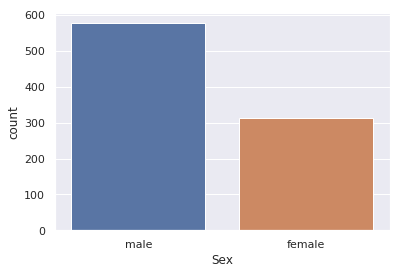

In [10]:
sns.countplot(x=titanic_df.Sex);

# Q4(.5) What is your observation from this plot.

Write observation  here





We can't use name as a feature for building any machine learning classifier(logistic regression). Let's look at Name columns and see if we can think of a better features for name.

In [11]:
titanic_df['Name'].sample(30)

170                      Van der hoef, Mr. Wyckoff
74                                   Bing, Mr. Lee
100                        Petranec, Miss. Matilda
16                            Rice, Master. Eugene
209                               Blank, Mr. Henry
225                   Berglund, Mr. Karl Ivar Sven
434                      Silvey, Mr. William Baird
370                    Harder, Mr. George Achilles
156               Gilnagh, Miss. Katherine "Katie"
376                Landergren, Miss. Aurora Adelia
211                     Cameron, Miss. Clear Annie
249                  Carter, Rev. Ernest Courtenay
632                      Stahelin-Maeglin, Dr. Max
247                Hamalainen, Mrs. William (Anna)
205                     Strom, Miss. Telma Matilda
456                      Millet, Mr. Francis Davis
426    Clarke, Mrs. Charles V (Ada Maria Winfield)
535                         Hart, Miss. Eva Miriam
765           Hogeboom, Mrs. John C (Anna Andrews)
458                            

# Q5.(.5 points) Can you suggest a feature based on *Name* columns 

Write 
your
suggestion
here





# Q6(.5 points) Create a new feature named *Title* from the *Name* columns.

Hint: Here are different title

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different title meant that time.

In [12]:
titanic_df["Title"] = titanic_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
titanic_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plot for male and female.

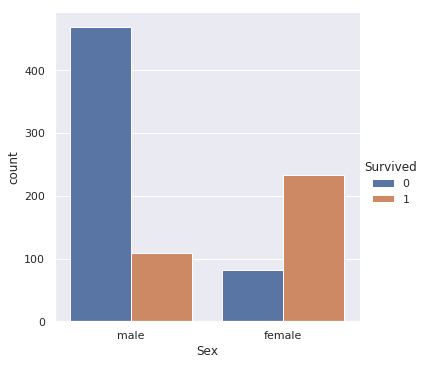

In [13]:
sns.catplot(x="Sex", hue ="Survived", kind ="count", data=titanic_df);

# Q 8(.5 points) What is your observation from these plots

More men than women died than women, and conversely more women survived. In a similar way, most of the men died (more than 4 to 1) and most of the women died (more than 2 to 1).

Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age nan value by the mean for each **Title** group.

In [14]:
titanic_df.loc[titanic_df.Age.isnull(), "Age"] = titanic_df.Age.mean()

In [15]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_type     0
Title          0
dtype: int64

There are two record with missing Embarked value.

In [16]:
# Let's drop these two record
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [17]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [18]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [19]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [20]:
titanic_clean_df = pd.concat([titanic_clean_df, pd.get_dummies(titanic_clean_df.Title, prefix="Title_")], axis=1)
titanic_clean_df = pd.concat([titanic_clean_df, pd.get_dummies(titanic_clean_df.Cabin_type, prefix="Cabin_type_")], axis=1)
titanic_clean_df.drop(["Title", "Cabin_type"], axis=1, inplace=True)

In [21]:
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title__Capt,Title__Col,...,Title__the Countess,Cabin_type__A,Cabin_type__B,Cabin_type__C,Cabin_type__D,Cabin_type__E,Cabin_type__F,Cabin_type__G,Cabin_type__O,Cabin_type__T
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
titanic_clean_df.dtypes

Survived                 int64
Pclass                   int64
Sex                      int64
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Embarked                object
Title__Capt              uint8
Title__Col               uint8
Title__Don               uint8
Title__Dr                uint8
Title__Jonkheer          uint8
Title__Lady              uint8
Title__Major             uint8
Title__Master            uint8
Title__Miss              uint8
Title__Mlle              uint8
Title__Mme               uint8
Title__Mr                uint8
Title__Mrs               uint8
Title__Ms                uint8
Title__Rev               uint8
Title__Sir               uint8
Title__the Countess      uint8
Cabin_type__A            uint8
Cabin_type__B            uint8
Cabin_type__C            uint8
Cabin_type__D            uint8
Cabin_type__E            uint8
Cabin_type__F            uint8
Cabin_type__G            uint8
Cabin_ty

# Q11.(.5) Plot headmap of correlation using titanic_df

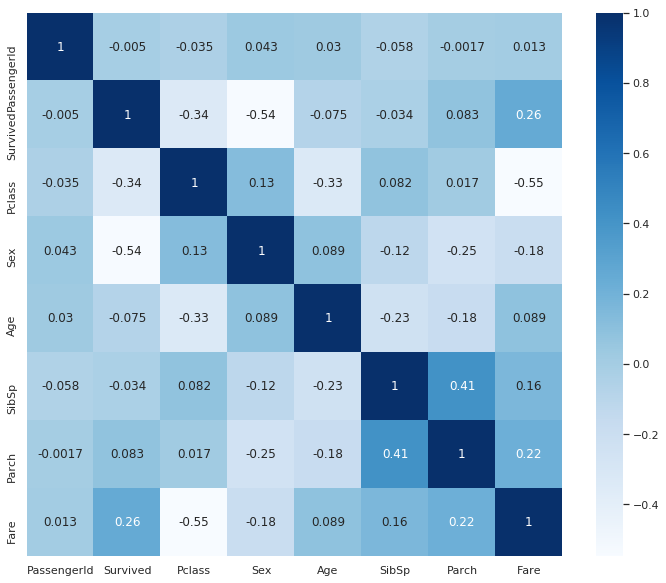

In [23]:
colormap = plt.cm.Blues
plt.figure(figsize=(12,10))
sns.heatmap(titanic_df.corr(), cmap=colormap, annot=True);

# Q 12.(.5) What are your observation from this heatmap.

Survivability is negatively correlated to Pclass (Passenger class) and Sex. We have already seen the survavabily to gender connection. In this case, the higher the passenger class, higher the likelihood of survival from the sinking of the Titanic.

Fare and Passenger class are also negatively correlated. As class level increases (first class being the best) price decreases. 

 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not the a linear relationship between variables(Survived vs any other attributes).

For categorical variable, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of Pearson’s Chi-Square Test.

Let's use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let's copy paste this here

In [24]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

Let's work with  titanic dataset again


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select record with Title value = *Master., Miss., Mr. or Mrs.*     into titanic_df_small.

You can check other title doesn't have enough record, hence ignoring them from our analysis.

In [25]:
titles = ["Master", "Miss", "Mr", "Mrs"]
titanic_df_small = titanic_df[titanic_df.Title.isin(titles)]
titanic_df_small

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,O,S,O,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,O,S,O,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.000000,0,5,382652,29.1250,O,Q,O,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,B,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,O,S,O,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,C,Mr


# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [26]:
confusion_matrix = pd.crosstab(titanic_df_small.Title, titanic_df_small.Survived)
confusion_matrix

Survived,0,1
Title,,
Master,17,23
Miss,55,126
Mr,436,81
Mrs,26,98


In [27]:
cramers_v(confusion_matrix)

0.56837187121439

# Q 15(.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [28]:
titanic_df_small["Encoded_title"] = preprocessing.LabelEncoder().fit_transform(titanic_df_small.Title)
titanic_df_small

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title,Encoded_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,O,S,O,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,C,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,O,S,O,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.000000,0,5,382652,29.1250,O,Q,O,Mrs,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,B,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,O,S,O,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,C,Mr,2


# Q 16(.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [29]:
titanic_df_small.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Encoded_title
PassengerId,1.000000,-0.013474,-0.017290,0.046289,0.023005,-0.054654,0.000296,0.008817,0.056251
Survived,-0.013474,1.000000,-0.336881,-0.539414,-0.075823,-0.034891,0.089020,0.252334,-0.072876
Pclass,-0.017290,-0.336881,1.000000,0.136470,-0.308981,0.078599,0.002289,-0.555501,-0.115990
Sex,0.046289,-0.539414,0.136470,1.000000,0.075427,-0.119617,-0.251070,-0.180527,0.028846
Age,0.023005,-0.075823,-0.308981,0.075427,1.000000,-0.239834,-0.174234,0.087088,0.449969
SibSp,-0.054654,-0.034891,0.078599,-0.119617,-0.239834,1.000000,0.415295,0.156795,-0.223858
Parch,0.000296,0.089020,0.002289,-0.251070,-0.174234,0.415295,1.000000,0.220659,-0.103699
Fare,0.008817,0.252334,-0.555501,-0.180527,0.087088,0.156795,0.220659,1.000000,-0.023811
Encoded_title,0.056251,-0.072876,-0.115990,0.028846,0.449969,-0.223858,-0.103699,-0.023811,1.000000


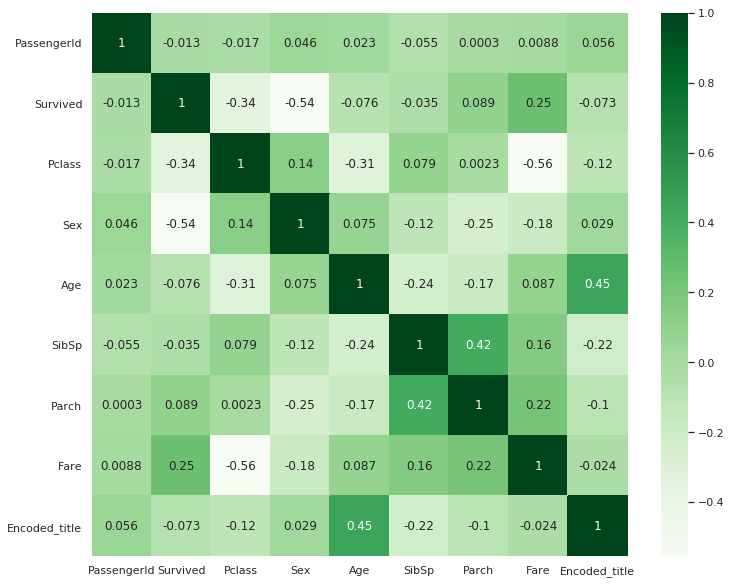

In [30]:
colormap = plt.cm.Greens
plt.figure(figsize=(12,10))
sns.heatmap(titanic_df_small.corr(), cmap=colormap, annot=True);

# Q 17. (.5 points) Whats is your observation between using cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

Cramer's V: 0.56837187121439
Correlation coefficient: -0.072876